In [26]:
import pandas as pd

# Load the dataset
file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an overview
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [27]:
# Check for missing values and duplicates in the dataset
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

# Summary of missing values and duplicate records
missing_values, duplicates

(User ID                                    0
 Fan Challenges Completed                   0
 Predictive Accuracy (%)                    0
 Virtual Merchandise Purchases              0
 Sponsorship Interactions (Ad Clicks)       0
 Time on Live 360 (mins)                    0
 Real-Time Chat Activity (Messages Sent)    0
 dtype: int64,
 0)

In [28]:
# Check the data types of each column
data_types = data.dtypes

# Summary statistics to check for potential outliers
summary_stats = data.describe()

data_types, summary_stats

(User ID                                    object
 Fan Challenges Completed                    int64
 Predictive Accuracy (%)                     int64
 Virtual Merchandise Purchases               int64
 Sponsorship Interactions (Ad Clicks)        int64
 Time on Live 360 (mins)                     int64
 Real-Time Chat Activity (Messages Sent)     int64
 dtype: object,
        Fan Challenges Completed  Predictive Accuracy (%)  \
 count                100.000000               100.000000   
 mean                   5.790000                74.990000   
 std                    2.825908                14.033506   
 min                    1.000000                50.000000   
 25%                    3.000000                62.000000   
 50%                    6.000000                77.000000   
 75%                    8.000000                86.500000   
 max                   10.000000                98.000000   
 
        Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks) 

- Fan Challenges Completed: The number of challenges completed ranges from 1 to 10, with a mean of about 5.79.
- Predictive Accuracy (%): Ranges from 50% to 98%, with a relatively high average of 74.99%.
- Virtual Merchandise Purchases: Most users have purchased between 1 to 5 items, with a few outliers having 0 purchases.
- Sponsorship Interactions (Ad Clicks): Clicks range from 0 to 19, with a high spread (mean of 8.68 and standard deviation of 6.34).
- Time on Live 360 (mins): Users spent between 60 and 199 minutes, with a mean of 129 minutes.
- Real-Time Chat Activity: Users have sent between 0 and 49 messages, with a median of 25 messages.

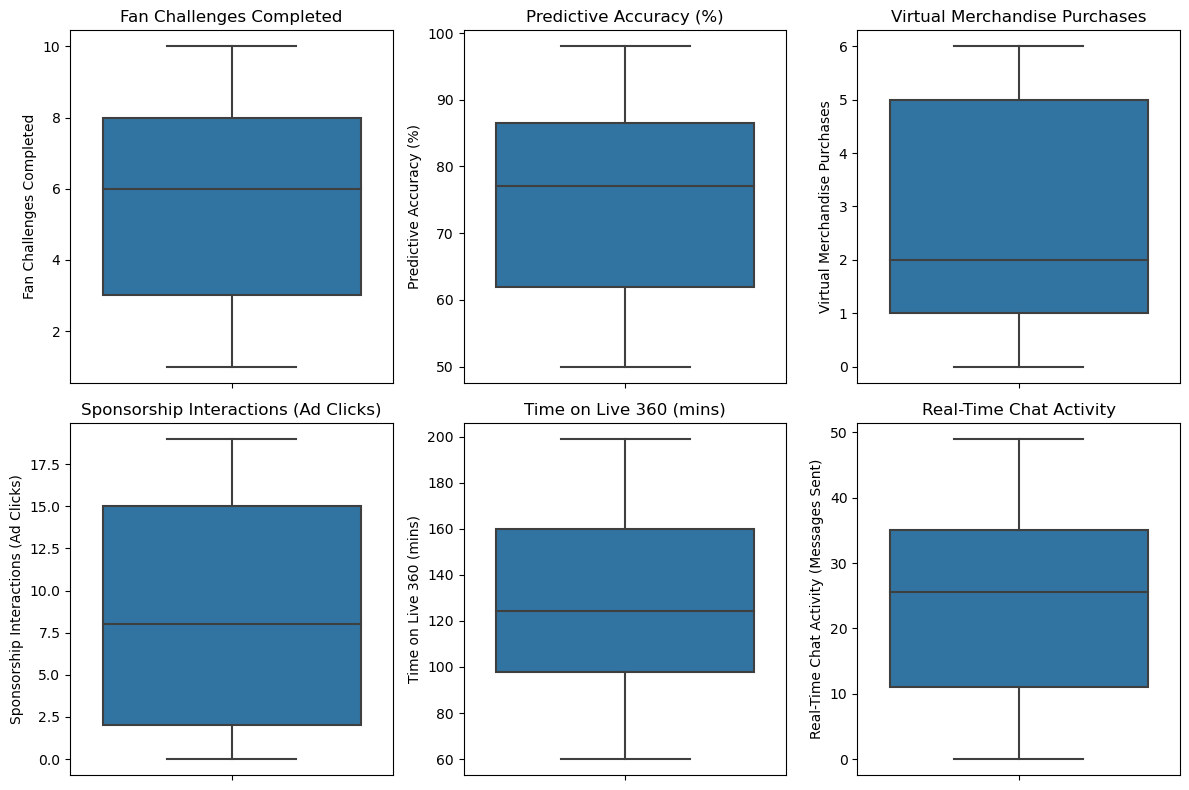

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize potential outliers
plt.figure(figsize=(12, 8))

# Subplot for each numerical feature
plt.subplot(2, 3, 1)
sns.boxplot(y=data['Fan Challenges Completed'])
plt.title('Fan Challenges Completed')

plt.subplot(2, 3, 2)
sns.boxplot(y=data['Predictive Accuracy (%)'])
plt.title('Predictive Accuracy (%)')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['Virtual Merchandise Purchases'])
plt.title('Virtual Merchandise Purchases')

plt.subplot(2, 3, 4)
sns.boxplot(y=data['Sponsorship Interactions (Ad Clicks)'])
plt.title('Sponsorship Interactions (Ad Clicks)')

plt.subplot(2, 3, 5)
sns.boxplot(y=data['Time on Live 360 (mins)'])
plt.title('Time on Live 360 (mins)')

plt.subplot(2, 3, 6)
sns.boxplot(y=data['Real-Time Chat Activity (Messages Sent)'])
plt.title('Real-Time Chat Activity')

plt.tight_layout()
plt.show()


- Virtual Merchandise Purchases: There are some users with fewer or no purchases, but no extreme outliers.
- Sponsorship Interactions (Ad Clicks): A few potential outliers with higher values.
- Time on Live 360 (mins): Users with close to the maximum (199 minutes) might be considered outliers, though this could still be valid usage behavior.
- Real-Time Chat Activity: A few users with very high message counts.

In [13]:
# Create a new feature "Total Engagement"
data['Total Engagement'] = (
    data['Fan Challenges Completed'] + 
    data['Time on Live 360 (mins)'] + 
    data['Real-Time Chat Activity (Messages Sent)'] + 
    data['Sponsorship Interactions (Ad Clicks)']
)

# Let's check the newly created feature
data[['User ID', 'Total Engagement']].head()


,User ID,Total Engagement
0,U001,155
1,U002,151
2,U003,104
3,U004,202
4,U005,73


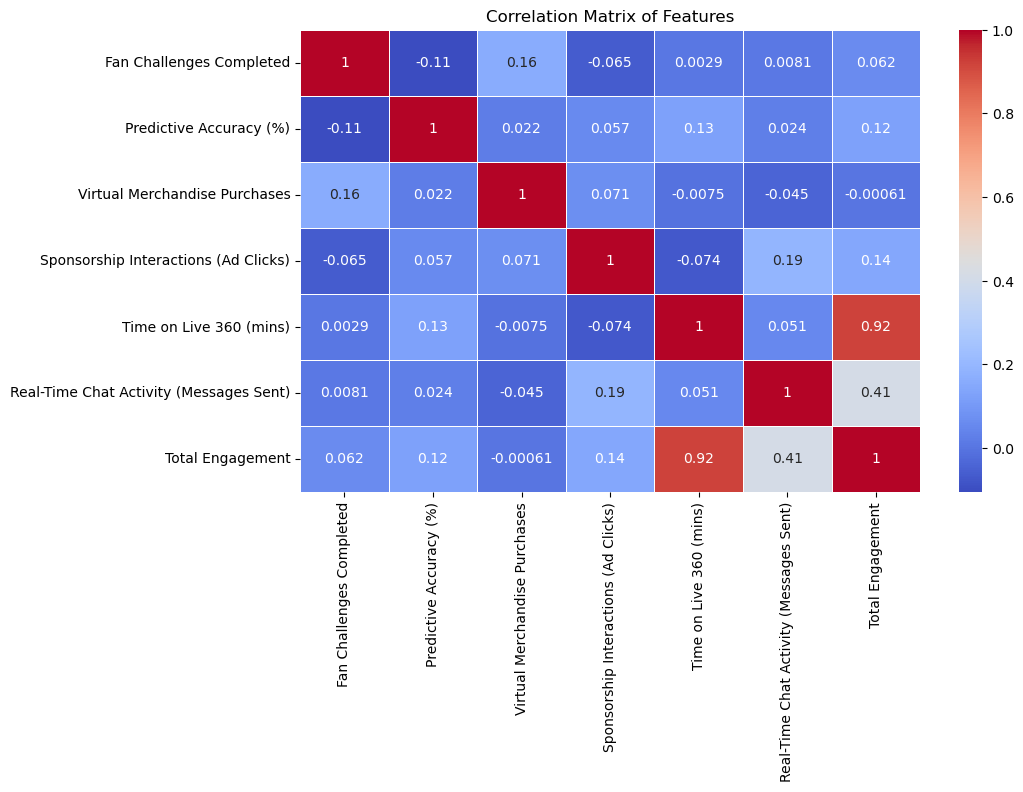

In [14]:
# Create a correlation matrix to examine relationships between variables
correlation_matrix = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                           'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                           'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 
                           'Total Engagement']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


- Total Engagement is highly correlated with Fan Challenges Completed, Time on Live 360, and Real-Time Chat Activity, which is expected since it's derived from those features.
- Virtual Merchandise Purchases has a weak correlation with most features, suggesting that user engagement does not directly predict purchases in this case.
- Sponsorship Interactions (Ad Clicks) also shows weak correlations with most features, indicating that it might not be driven by the same engagement behaviors.

C:\Users\ayman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


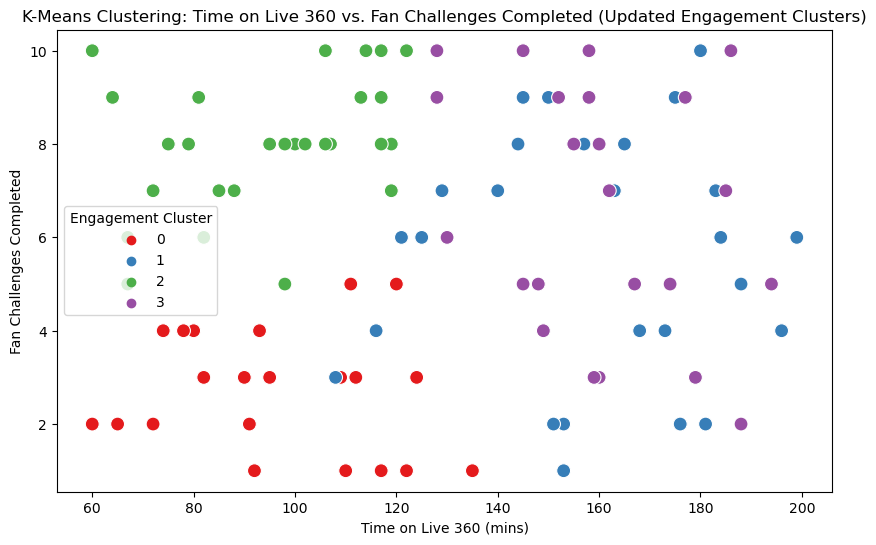

In [21]:
# Refine clustering by focusing on the updated engagement-related features, including Sponsorship Interactions
engagement_features_updated = data[['Fan Challenges Completed', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Sponsorship Interactions (Ad Clicks)', 'Total Engagement']]

# Standardize the updated engagement features
scaled_engagement_features_updated = scaler.fit_transform(engagement_features_updated)

# Apply K-Means clustering with 4 clusters (focused on the updated engagement)
kmeans_engagement_updated = KMeans(n_clusters=4, random_state=42)
data['Engagement_Cluster_Updated'] = kmeans_engagement_updated.fit_predict(scaled_engagement_features_updated)

# Visualize the new clusters based on updated engagement features
plt.figure(figsize=(10, 6))

# Scatter plot using 'Time on Live 360' and 'Fan Challenges Completed'
sns.scatterplot(x=data['Time on Live 360 (mins)'], y=data['Fan Challenges Completed'], hue=data['Engagement_Cluster_Updated'], palette='Set1', s=100)

plt.title('K-Means Clustering: Time on Live 360 vs. Fan Challenges Completed (Updated Engagement Clusters)')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Fan Challenges Completed')
plt.legend(title='Engagement Cluster')
plt.show()

# Analysis of Cluster Engagement:


Cluster 0 (Low Engagement on Both):
These users are the least engaged. They likely need more incentives or introductions to the app's features to increase their interaction.
Actionable Insight: Focus on re-engagement tactics such as simple challenges and introductory guides to increase participation.

Cluster 1 (High Engagement on Both):
These are your power users with high participation in both Live 360 and challenges.
Actionable Insight: Provide exclusive offers or loyalty rewards to retain them, and consider offering VIP experiences.

Cluster 2 (Low Time on Live 360, High Fan Challenges):
These users prefer engaging in fan challenges but are less interested in Live 360.
Actionable Insight: Encourage these users to try the Live 360 feature by offering bonus points or incentives for watching more races or participating in live discussions.

Cluster 3 (High Engagement on Both):
This cluster is similar to Cluster 1, showing high engagement across both features.
Actionable Insight: Similar strategies to Cluster 1—continue to enhance their experience through advanced features and personalized rewards, but also explore opportunities to keep them engaged long-term.

# Strategic Approach Based on Clusters: 

Low Engagement (Cluster 0): Focus on educating and onboarding users, introducing them to app features in a simple way to increase engagement.
High Engagement (Clusters 1 and 3): Retain these users with advanced, exclusive content and personalized experiences that continue to challenge and reward them.
Mixed Engagement (Cluster 2): Target users who prefer challenges with incentives to explore other features like Live 360, and reward them for balanced interaction.

# Predicting If A User Will Make A Purchase Or Not Using Random Forest: 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

# Convert "Virtual Merchandise Purchases" to a binary column (0 for no purchase, 1 for any purchase)
df['Purchase Binary'] = df['Virtual Merchandise Purchases'].apply(lambda x: 1 if x > 0 else 0)

# Create the new feature again 'Total Engagement'
df['Total Engagement'] = (
    df['Fan Challenges Completed'] + 
    df['Time on Live 360 (mins)'] + 
    df['Real-Time Chat Activity (Messages Sent)'] + 
    df['Sponsorship Interactions (Ad Clicks)']
)

# Select features and target
X = df[['Total Engagement', 'Predictive Accuracy (%)']]
y = df['Purchase Binary']

# Split the data into training (70) and testing sets (30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.7666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.85      0.88      0.86        25

    accuracy                           0.77        30
   macro avg       0.55      0.54      0.54        30
weighted avg       0.75      0.77      0.76        30



The model achieved an accuracy of 77%: For class 1 (purchase made), the precision is 0.85, and the recall is 0.88, meaning the model is good at identifying users who made a purchase.
For class 0 (no purchase), the model didn't perform well due to the smaller number of samples with no purchases, reflected in a precision of 0.25 and a recall of 0.20.

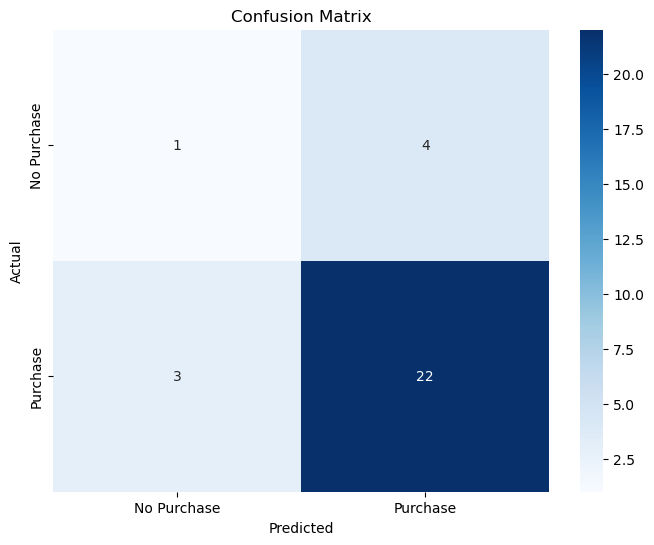

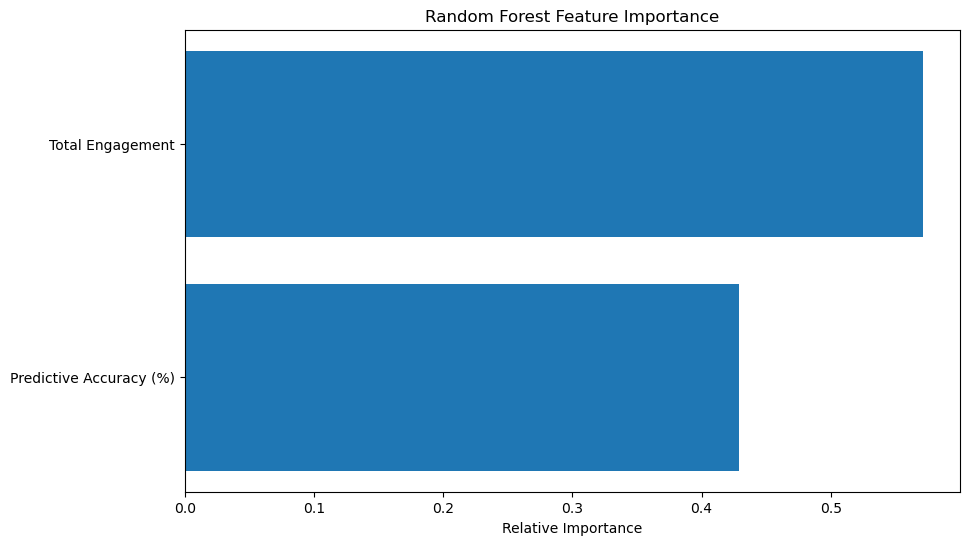

In [24]:
# visualizing the confusion matrix and feature importance of the Random Forest model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = clf.feature_importances_
features = X.columns

# Plotting the feature importance
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Random Forest Feature Importance')
plt.xlabel('Relative Importance')
plt.show()


Confusion Matrix: This shows the distribution of actual versus predicted values for purchase behavior. The model seems to perform well in predicting purchases, but further tuning may improve it.

Feature Importance: This highlights which features are most important in predicting purchases. In this case, both Total Engagement and Predictive Accuracy (%) have been considered, and we can see how much each contributes to the decision-making process.

# Insights: 


Based on the feature importance, Total Engagement appears to be a strong predictor for whether a user will make a purchase. This indicates that users who are more engaged across multiple dimensions (fan challenges, time on "Live 360", sponsorship interactions, etc.) are more likely to buy virtual merchandise.

Additionally, Predictive Accuracy has some predictive power, suggesting that users who perform well in fan challenges may also be more likely to make purchases.

# Clusters: 
- Based on our previous analysis of clusters, we can conclude that Cluster 1 and Cluster 3 are the ones who will most likely make a purchase given their high engagement.   

### New Fan Challenge Proposal: "Predict the Most Engaged Driver"

In order to drive both fan engagement and monetization on the VeloCityX app, I propose introducing a new fan challenge called **"Predict the Most Engaged Driver."**

#### Challenge Goal:
Fans will be asked to predict which driver will generate the highest overall fan engagement during a race. The engagement score will be calculated based on multiple real-time fan interaction metrics, which include:
- Number of fans viewing the driver’s cockpit view in Live 360.
- Number of messages sent in real-time chat about the driver.
- Number of sponsorship interactions (e.g., ad clicks) associated with the driver.

#### How Engagement is Calculated:
The total engagement score for each driver will be determined by aggregating the following activities:
- **Live 360 Views**: The number of fans watching the driver’s cockpit or aerial drone view in real-time.
- **Real-Time Chat Messages**: The number of messages in real-time chat mentioning or discussing the driver.
- **Sponsorship Interactions**: The number of interactions (e.g., ad clicks) related to sponsorship content featuring or promoting the driver.

#### Predicted Outcome:
This fan challenge is expected to:
1. **Increase Real-Time Engagement**: Fans will actively track their predicted driver's engagement throughout the race, leading to higher time spent on the app and more interaction with Live 360 views and chat features.
2. **Boost Sponsorship Interactions**: Since sponsorship content will be tied to the engagement score, fans may interact more with ads in hopes of supporting their selected driver. This would increase sponsorship monetization through ad clicks.
3. **Drive Virtual Merchandise Sales**: Fans engaged in the challenge may be more inclined to purchase virtual merchandise related to the driver they are supporting or the race as a whole.

By integrating this challenge, we can encourage continuous participation and enhance both user engagement and the monetization potential of the VeloCityX app.

#### Why This Challenge Works:
- **Active Participation**: Instead of simply watching the race, fans will need to engage in various aspects of the app (e.g., Live 360 views, chat, sponsorships) to track the progress of their selected driver. This will increase real-time activity.
- **Social Interaction**: Fans will be more likely to discuss their predictions in chat, boosting interaction and social engagement on the platform.
- **Monetization**: By linking sponsorship interactions to the challenge, we can create opportunities to increase ad clicks and merchandise purchases, thereby improving the app’s monetization strategy.

This challenge is designed to enhance user experience while providing actionable ways to increase monetization for the app during races.
